In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/california-housing.csv')

# Take a Quick Look at the Data Structure

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


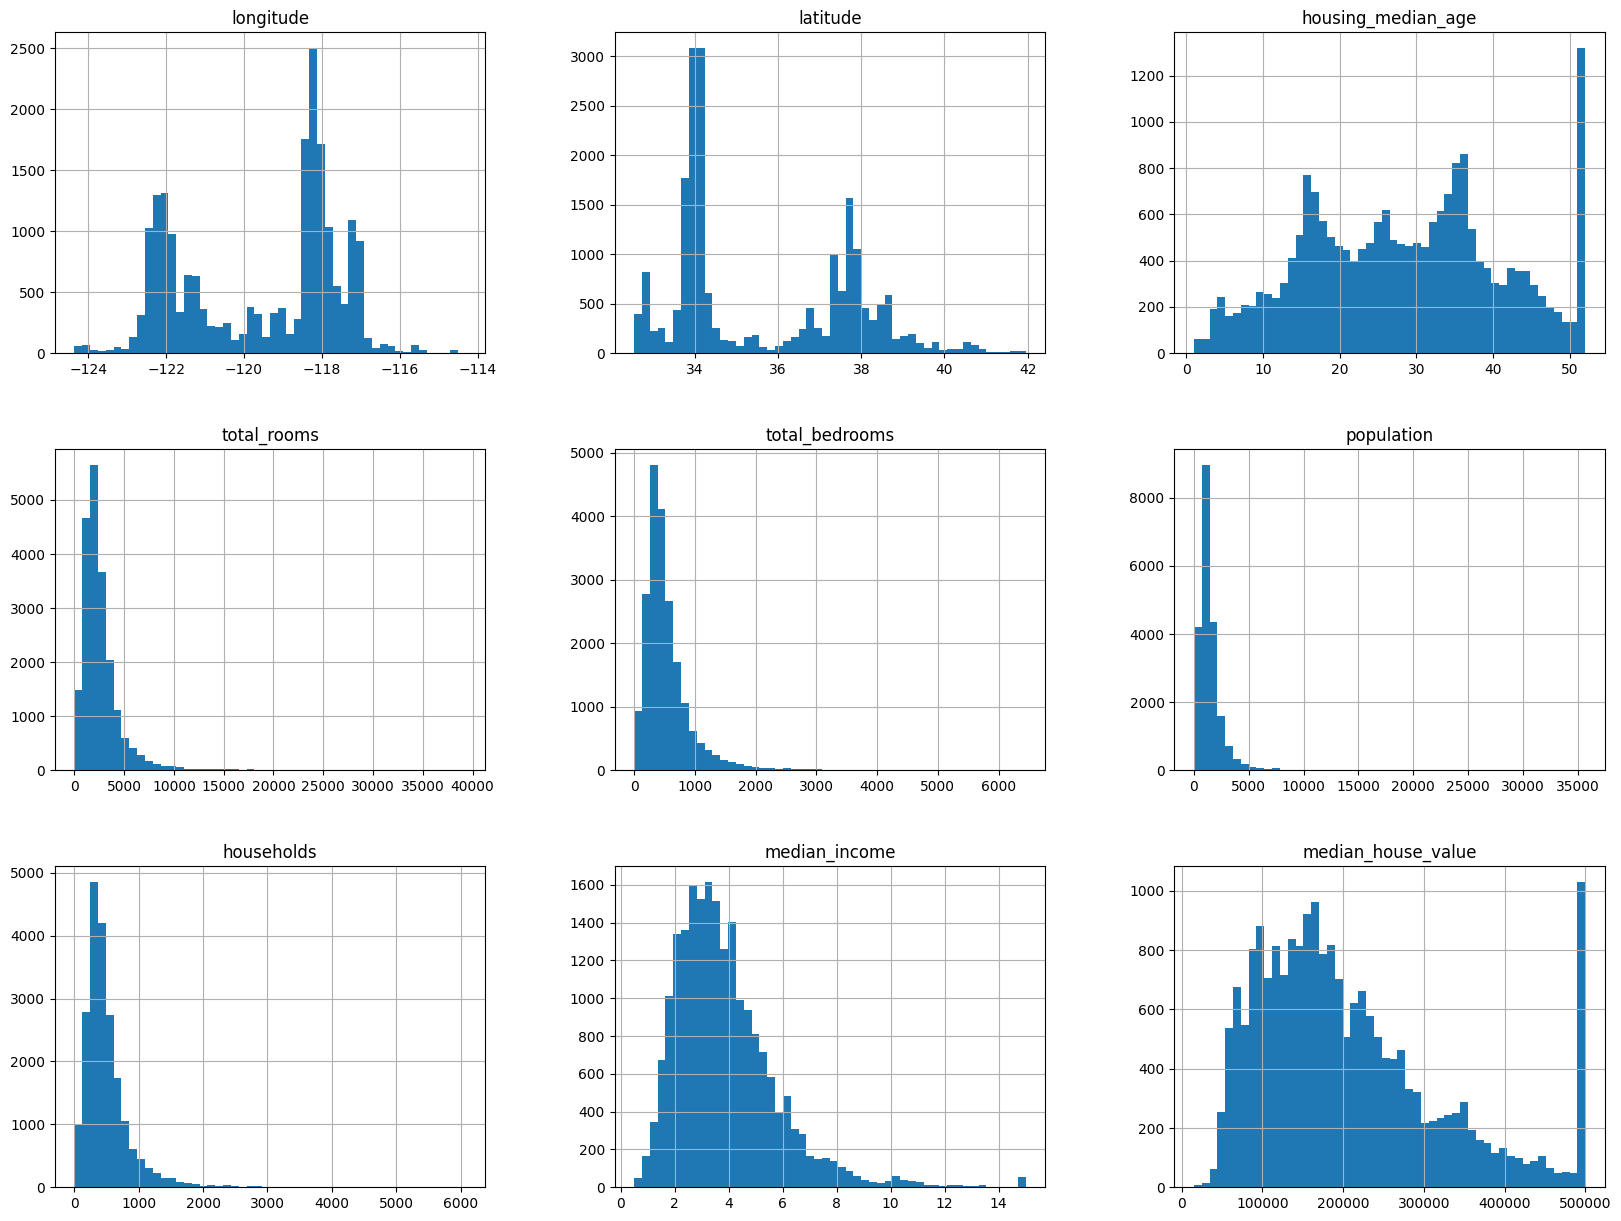

In [ ]:
%matplotlib inline
df.hist( bins=50, figsize= (20,15))
plt.show()

# Splitting the Data

In [ ]:

train, test = train_test_split(df, train_size = 0.8, random_state=40)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9226,-120.04,36.93,11,3606,699.0,2074,644,2.6941,INLAND,63300
11826,-121.04,39.00,21,4059,730.0,1874,693,4.8051,INLAND,174300
4553,-118.24,34.06,33,390,199.0,435,193,1.1979,<1H OCEAN,350000
10787,-117.92,33.64,25,2224,580.0,985,516,3.1305,<1H OCEAN,268800
4104,-118.35,34.13,39,1610,278.0,511,278,4.3333,<1H OCEAN,385900


In [ ]:
train.shape

(16512, 10)

In [ ]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16352.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564455,35.628552,28.598474,2638.195252,538.743028,1428.950642,500.064014,3.865811,206139.598232
std,2.004657,2.137635,12.523516,2178.416787,419.126672,1142.330614,381.878667,1.895640,114853.239333
min,-124.350000,32.540000,1.000000,8.000000,1.000000,8.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1453.000000,297.000000,791.000000,280.750000,2.562500,119000.000000
50%,-118.490000,34.250000,29.000000,2127.000000,436.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3145.000000,648.000000,1729.000000,605.000000,4.739375,263900.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 9226 to 11590
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16352 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   median_house_value  16512 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


# Handle missing values

In [ ]:
train.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,160
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [ ]:
#since there are many outliers, replace with median
train['total_bedrooms'] = train['total_bedrooms'].fillna(train['total_bedrooms'].median())

In [ ]:
train.duplicated().sum()

np.int64(0)

# EDA

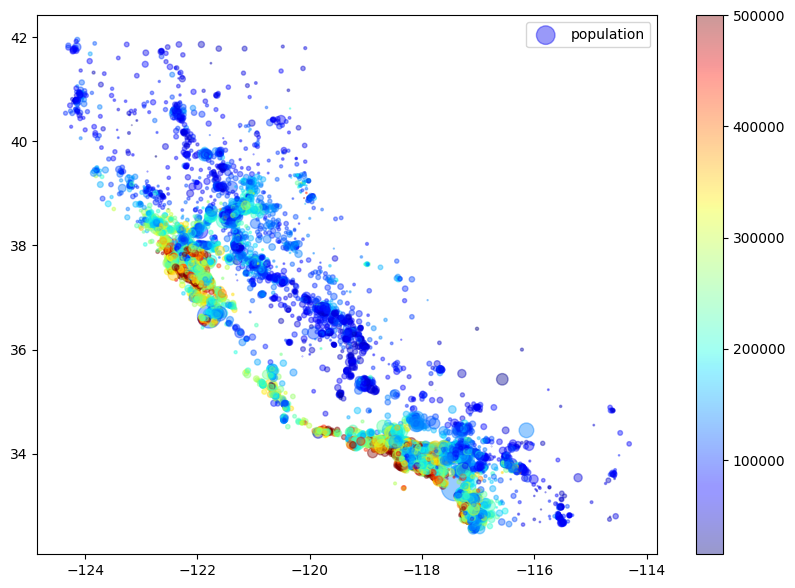

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x = train['longitude'],y =  train['latitude'], s = train['population']/100,label = 'population', c = train['median_house_value'],\
                cmap = plt.get_cmap('jet'), alpha = 0.4)
plt.colorbar()
plt.legend()
plt.show()

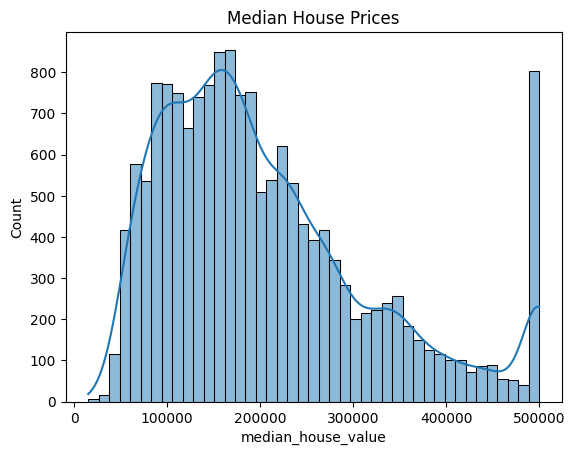

In [ ]:
sns.histplot(data=train, x=train.median_house_value,kde=True)
plt.title('Median House Prices')
plt.show()

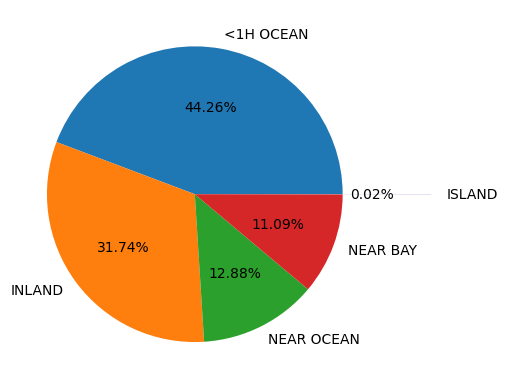

In [ ]:
explode = (0, 0, 0, 0,0.6)
labels = df.ocean_proximity.value_counts().index.values
plt.pie(df.ocean_proximity.value_counts(),labels =labels ,autopct='%1.2f%%',\
       explode = explode
       )
plt.show()

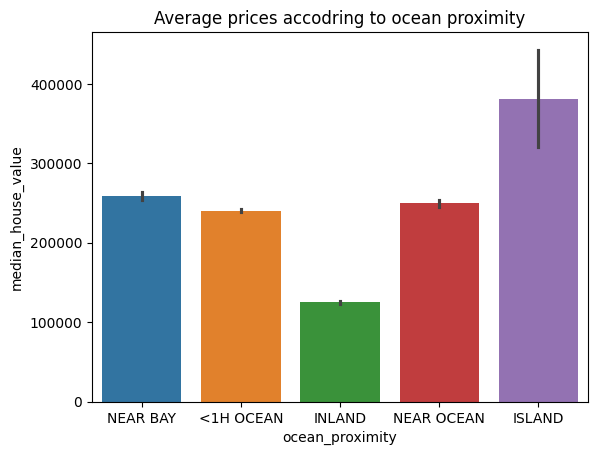

In [ ]:
sns.barplot(data=df, x = 'ocean_proximity', y ='median_house_value' , hue = 'ocean_proximity')
plt.title("Average prices accodring to ocean proximity")
plt.show()

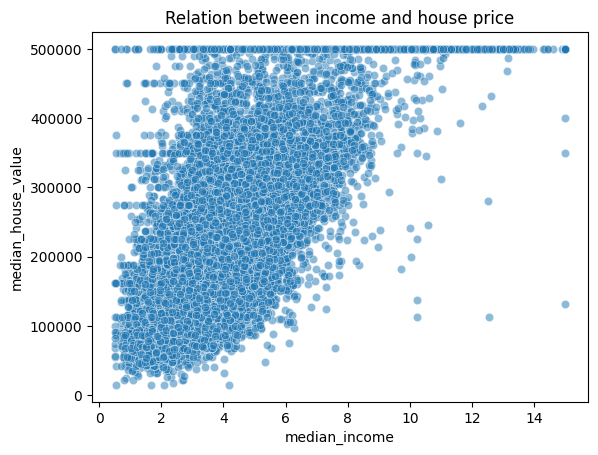

In [ ]:
sns.scatterplot(data=df, x='median_income', y='median_house_value',alpha = 0.5)
plt.title("Relation between income and house price")
plt.show()
# there is a strong relation but it looks that there are some outliers

# Experimenting with Attribute Combinations

In [ ]:
train['total_rooms_per_households'] = train['total_rooms']/train['households']
train['total_bedrooms_per_households'] = train['total_bedrooms']/train['households']
train['population_per_households'] = train['population']/train['households']
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_rooms_per_households,total_bedrooms_per_households,population_per_households
9226,-120.04,36.93,11,3606,699.0,2074,644,2.6941,INLAND,63300,5.599379,1.085404,3.220497
11826,-121.04,39.00,21,4059,730.0,1874,693,4.8051,INLAND,174300,5.857143,1.053391,2.704185
4553,-118.24,34.06,33,390,199.0,435,193,1.1979,<1H OCEAN,350000,2.020725,1.031088,2.253886
10787,-117.92,33.64,25,2224,580.0,985,516,3.1305,<1H OCEAN,268800,4.310078,1.124031,1.908915
4104,-118.35,34.13,39,1610,278.0,511,278,4.3333,<1H OCEAN,385900,5.791367,1.000000,1.838129


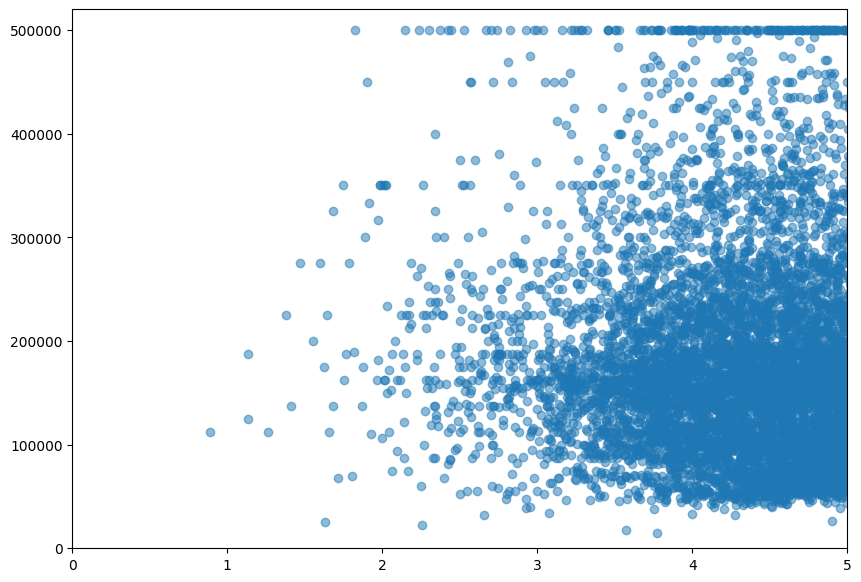

In [ ]:
plt.figure(figsize= (10,7))
plt.scatter(train['total_rooms_per_households'], train['median_house_value'],  alpha = 0.5)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
train.isna().sum().sum()

np.int64(0)

# Check the Correlation

In [ ]:
numeric_cols = train.select_dtypes(include='number')
numeric_cols.corr()['median_house_value'].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.689565
total_rooms_per_households,0.143220
total_rooms,0.136670
housing_median_age,0.104681
households,0.065653
total_bedrooms,0.049393
population,-0.022397
population_per_households,-0.032061
total_bedrooms_per_households,-0.044509


median income is the most important column to predict median_house_value

Number of rooms, bedrooms and population are more meaningful when link it with the household.

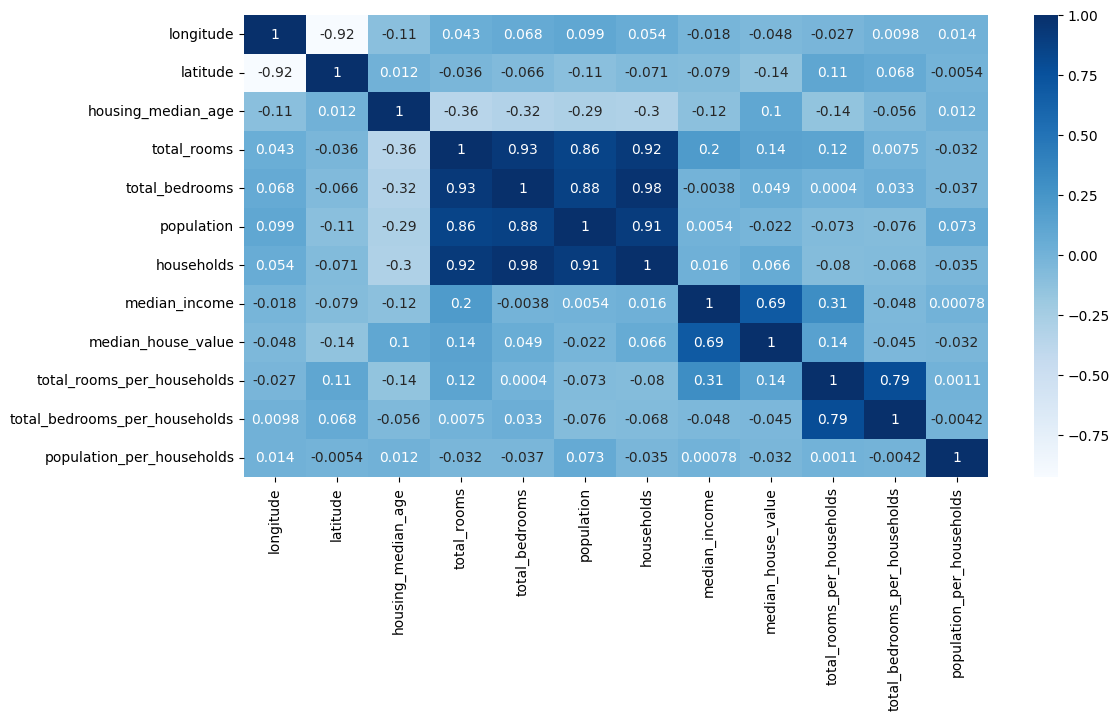

In [ ]:
corr = numeric_cols.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot =True, cmap='Blues')
plt.show()

 *   there is a strong relation between number of total rooms and number of total bedrooms so remove one of them and keep one that has a stronger relation with the taret column --> **remove total bedrooms**






In [ ]:
train.drop(columns=['total_bedrooms'],inplace=True)
train.shape

(16512, 12)

In [ ]:
data = train.copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,median_house_value,total_rooms_per_households,total_bedrooms_per_households,population_per_households
9226,-120.04,36.93,11,3606,2074,644,2.6941,INLAND,63300,5.599379,1.085404,3.220497
11826,-121.04,39.00,21,4059,1874,693,4.8051,INLAND,174300,5.857143,1.053391,2.704185
4553,-118.24,34.06,33,390,435,193,1.1979,<1H OCEAN,350000,2.020725,1.031088,2.253886
10787,-117.92,33.64,25,2224,985,516,3.1305,<1H OCEAN,268800,4.310078,1.124031,1.908915
4104,-118.35,34.13,39,1610,511,278,4.3333,<1H OCEAN,385900,5.791367,1.000000,1.838129


# Handling Outliers

<Figure size 1200x1400 with 0 Axes>

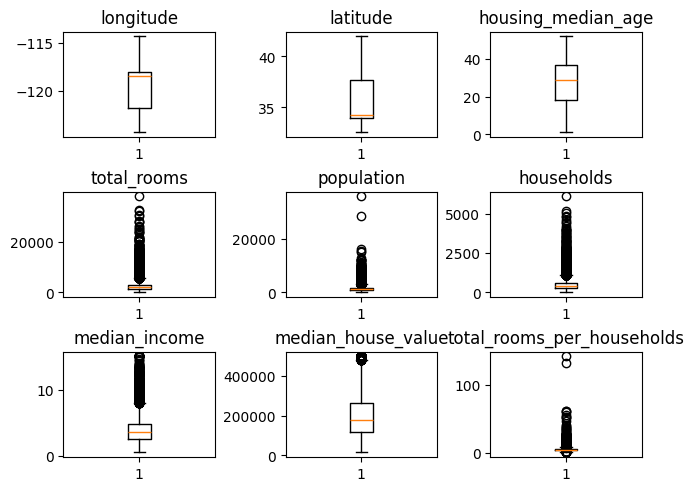

In [ ]:
numeric_cols = data.select_dtypes(include='number')
plt.figure(figsize=(12,14))
fig, axs = plt.subplots(nrows=3, ncols=3, layout='constrained')
cols = numeric_cols.columns
for i,ax in enumerate(axs.flat):

    ax.boxplot(numeric_cols.iloc[:,i])
    ax.set_title(cols[i])
# there are many outliers in the last 6 columns

In [ ]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_households,population_per_households
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564455,35.628552,28.598474,2638.195252,1428.950642,500.064014,3.865811,206139.598232,5.435044,1.104534,3.031102
std,2.004657,2.137635,12.523516,2178.416787,1142.330614,381.878667,1.895640,114853.239333,2.601228,0.558376,6.441502
min,-124.350000,32.540000,1.000000,8.000000,8.000000,1.000000,0.499900,14999.000000,0.888889,0.121482,0.692308
25%,-121.790000,33.930000,18.000000,1453.000000,791.000000,280.750000,2.562500,119000.000000,4.442934,1.005913,2.432105
50%,-118.490000,34.250000,29.000000,2127.000000,1168.000000,410.000000,3.531300,179300.000000,5.227803,1.049383,2.816946
75%,-118.010000,37.710000,37.000000,3145.000000,1729.000000,605.000000,4.739375,263900.000000,6.048437,1.100489,3.282749
max,-114.310000,41.950000,52.000000,37937.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,34.066667,599.714286


# IQR

In [ ]:
def IQR(data,col_name):
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25)
    iqr = q3-q1
    min = q1 - iqr*1.5
    max = q3 + iqr*1.5
    return data[data[col_name].between(min, max)]


In [ ]:
cols = numeric_cols.columns
for col in cols:
    data = IQR(data,col)

In [ ]:
train.isna().sum().sum()

np.int64(0)

# Handling Outliers Using KNN

In [ ]:
pip install pyod

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder

en = OneHotEncoder(sparse_output=False)
cat_array = en.fit_transform(train[['ocean_proximity']])

encoded_df = pd.DataFrame(cat_array, columns=en.get_feature_names_out(['ocean_proximity']), index= train.index)
train = train.drop(columns=['ocean_proximity'])

train = pd.concat([train, encoded_df], axis=1)


In [ ]:
X_train = train.drop(columns=['median_house_value'])
y_train = train['median_house_value']

In [ ]:
type(y_train.values.reshape(-1, 1))

numpy.ndarray

In [ ]:
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
from pyod.models.knn import KNN
knn = KNN()
knn.fit(X_train_scaled)

outliers = knn.labels_
X_train_cleaned = X_train_scaled[outliers == 0]
y_train_cleaned = y_train_scaled[outliers == 0]


In [ ]:
print('Before: ', train.shape)
print("using IQR",data.shape)
print("using knn", X_train_cleaned.shape)

Before:  (16512, 16)
using IQR (12161, 12)
using knn (14860, 15)


# Support Vector Machine Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'C': [ 1, 10, 100],
# 			'gamma': [1, 0.1, 0.01, 0.001],
# 			'kernel': ['rbf']}

# grid = GridSearchCV(SVR(), param_grid, verbose=3, cv =2)
# grid.fit(X_train_cleaned, y_train_cleaned)

In [ ]:
# grid.best_params_

In [ ]:
model = RandomForestRegressor(max_depth=12,random_state=2)
model.fit(X_train_cleaned,y_train_cleaned)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=12, random_state=2)

In [ ]:
vall = model.predict(X_train_cleaned)
r2_score(y_train_cleaned,vall)

0.9169371626383251

In [ ]:
model.predict()

# Pipelines

In [ ]:
def IQR(data,col_name):
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25)
    iqr = q3-q1
    min = q1 - iqr*1.5
    max = q3 + iqr*1.5
    return data[data[col_name].between(min, max)]

In [ ]:
cols = df.select_dtypes(include='number').columns
cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
for col in cols:
    df = IQR(df,col)

In [ ]:
df.shape

(16725, 10)

In [ ]:
x = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 40)

In [ ]:
# columns Tansformer returns numpy array
preprocess = ColumnTransformer(remainder='passthrough',
    transformers = [('imputer', SimpleImputer(strategy = 'median') ,['total_bedrooms'])]
)

In [ ]:
# creating new cols

from sklearn.base import BaseEstimator
class New_cols(BaseEstimator):
  def __init__(self):
    pass

  def fit(self, documents, y=None):
    return self

  def transform(self, data):
    data['total_rooms_per_households'] = data['total_rooms']/data['households']
    data['total_bedrooms_per_households'] = data['total_bedrooms']/data['households']
    data['population_per_households'] = data['population']/data['households']
    return data

In [ ]:
# hot encoding for specific columns
class encode_cat_col(BaseEstimator):
  def __init__(self):
    pass

  def fit(self,document,y=None):
    return self

  def transform(self,data):
    data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])
    return data_encoded

In [ ]:
class arrayToDF(BaseEstimator):
  def __init__(self, columns):
    self.columns = columns

  def fit(self,document,y=None):
    return self

  def transform(self, data):
    return pd.DataFrame(data, columns = self.columns)


In [ ]:
class dropCols(BaseEstimator):
  def __init__(self,drop_cols):
    self.drop_cols = drop_cols

  def fit(self,document, y=None):
    return self

  def transform(self,data):
    return data.drop(columns=self.drop_cols)

In [ ]:
# after remainder = passthrough, the order of columns becomes different as the imputed column gets first
original_cols = x_train.columns
imputed_cols = ['total_bedrooms']
remainder_cols = [col for col in original_cols if col != 'total_bedrooms']
new_order = imputed_cols + remainder_cols

In [ ]:
pipe2 = Pipeline(steps = [
    ('impute', preprocess),
    ('toDF', arrayToDF(new_order)),
    ('new cols', New_cols()),
    ('encoding_cat_cols', encode_cat_col()),
    ('drop columns', dropCols(['total_bedrooms','ocean_proximity'])),
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(max_depth=15,random_state=40))

])
# Pipeline expects the number of samples to stay constant between steps so I can't apply outlier removing

In [ ]:
pipe2.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['total_bedrooms'])])),
                ('toDF',
                 arrayToDF(columns=['total_bedrooms', 'longitude', 'latitude',
                                    'housing_median_age', 'total_rooms',
                                    'population', 'households', 'median_income',
                                    'ocean_proximity'])),
                ('new cols', New_cols()),
                ('encoding_cat_cols', encode_cat_col()),
                ('drop columns', dropCols(drop_cols=['total_bedrooms'])),
                ('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestRegressor(max_depth=15, random_state=40))])

In [ ]:
y_val = pipe2.predict(x_train)
r2_score(y_train, y_val)

0.9471481303921154

In [ ]:
from sklearn.metrics import r2_score
y_pred = pipe2.predict(x_test)
r2_score(y_test, y_pred)

0.7864084695381482